![](https://pic.superbed.cn/item/5dc62a928e0e2e3ee9c2e6c6.jpg)

In [1]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt 

In [17]:
# PassengerId => 乘客ID
# Pclass => 乘客等级(1/2/3等舱位)
# Name => 乘客姓名
# Sex => 性别
# Age => 年龄
# SibSp => 堂兄弟/妹个数
# Parch => 父母与小孩个数
# Ticket => 船票信息
# Fare => 票价
# Cabin => 客舱
# Embarked => 登船港口

# 读取训练集
data_train = pd.read_csv('./exercise_data/titanic8120/train.csv',encoding='UTF-8')
df_train = data_train

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 参看对应字段的类型
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# 查看数值型数据型的一些分布
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


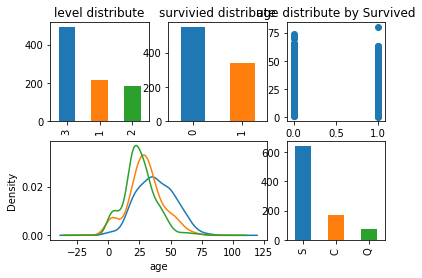

In [6]:
#乘客各属性分布



# level distribute
plt.subplot(2,3,1)
df_train.Pclass.value_counts().plot(kind='bar')
plt.title("level distribute")

# survivied distribute
plt.subplot(2,3,2)
df_train.Survived.value_counts().plot(kind='bar')
plt.title('survivied distribute')

# age distribute 按年龄看获救分布 (1为获救)
plt.subplot(2,3,3)
plt.scatter(df_train.Survived,df_train.Age)
plt.title('age distribute by Survived')

# survived by pclass
# 密度图：与直方图相关的一种类型图，是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的，通过给plot传入参数kind = 'kde' 即可。

plt.subplot(2,3,(4,5))
df_train.Age[df_train.Pclass == 1].plot(kind='kde')
df_train.Age[df_train.Pclass == 2].plot(kind='kde') 
df_train.Age[df_train.Pclass == 3].plot(kind='kde') 
plt.xlabel('age')


# 港口的登陆人数
plt.subplot(2,3,6)
df_train.Embarked.value_counts().plot(kind='bar')

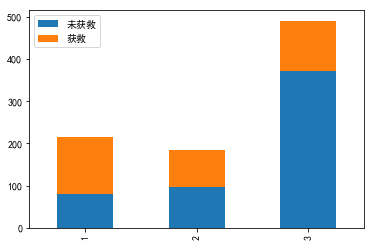

In [7]:
#属性与获救结果的关联统计 ‘为了查看那些特征与存活相关’


# 看看各乘客等级的获救情况
plt.rcParams['font.sans-serif'] = 'SimHei'
Survive_0 = df_train.Pclass[df_train.Survived == 0].value_counts()
Survive_1 = df_train.Pclass[df_train.Survived == 1].value_counts()
df = pd.DataFrame({u'未获救':Survive_0,u'获救':Survive_1})
df.plot(kind = 'bar',stacked = True)
plt.show()

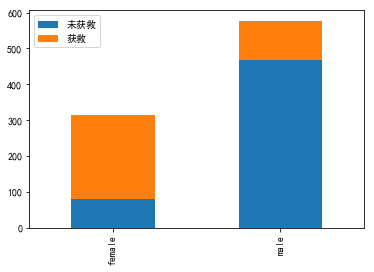

In [8]:
#看看各性别的获救情况
su0 = df_train.Sex[df_train.Survived == 0].value_counts() 
su1 = df_train.Sex[df_train.Survived == 1].value_counts()
df2 = pd.DataFrame({u'未获救':su0,u'获救':su1})
df2.plot(kind = 'bar',stacked = True)

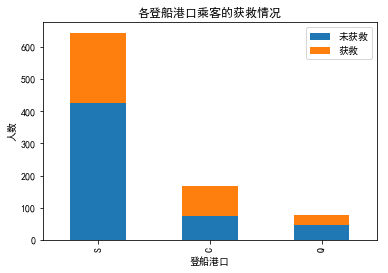

In [9]:
# 各登船港口的获救情况
Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'未获救':Survived_0,u'获救':Survived_1})
df.plot(kind='bar', stacked=True)
plt.title(u"各登船港口乘客的获救情况")
plt.xlabel(u"登船港口") 
plt.ylabel(u"人数") 
plt.show()

In [10]:
# 看看 堂兄弟/妹，孩子/父母有几人，对是否获救的影响
df_train.groupby(['Parch','SibSp']).count().PassengerId

Parch  SibSp
0      0        537
       1        123
       2         16
       3          2
1      0         38
       1         57
       2          7
       3          7
       4          9
2      0         29
       1         19
       2          4
       3          7
       4          9
       5          5
       8          7
3      0          1
       1          3
       2          1
4      0          1
       1          3
5      0          2
       1          3
6      1          1
Name: PassengerId, dtype: int64

In [11]:
#简单预处理 利用随机森林对年龄进行预测
from sklearn.ensemble import RandomForestRegressor
def to_setAge():
    df_age = data_train[['Age','Fare','SibSp','Parch','Fare']]
    know_age = df_age[df_age.Age.notnull()].values
    unknow_age = df_age[df_age.Age.isnull()].values
    _y =know_age[:,0]
    _x = know_age[:,1:]
    rf = RandomForestRegressor(n_estimators=2000,random_state=0,n_jobs=-1)
    rf.fit(_x,_y)
    age_predict = rf.predict(unknow_age[:,1:])
    data_train.loc[(data_train.Age.isnull()),'Age'] = age_predict
    return data_train
    
def to_setCabin(data_train):
    data_train.loc[(data_train.Cabin.notnull()),'Cabin'] = 'Yes'
    data_train.loc[(data_train.Cabin.isnull()),'Cabin'] = 'No'
  
    return data_train
data_train = to_setAge()
data_train = to_setCabin(data_train)

In [12]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.814548,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


In [2]:
op = pd.DataFrame({"marker":["yes","no","yes","no"]})

In [13]:
op = pd.get_dummies(op["marker"],prefix="marker")

In [15]:
op.filter(regex=".*?_no",axis=1)

,marker_no
0,0
1,1
2,0
3,1


In [16]:
import pandas_profiling

In [19]:
pandas_profiling.ProfileReport(data_train).to_file("./resr.html")